# __Regularizacion en Modelos Lineales__ 

La mejor manera de reducir el sobreajuste en un modelo lineal es con la regularizacion. Este proceso consiste en restringir los pesos del modelo. Existen tres formas de restringir los pesos como veremos a continuacion:

## Regresion Ridge

Es una version regularizada de la regresion lineal y consiste en agregar el termino $\alpha \sum_{i}^{n} \theta_{i}^2$ a la funcion de costo. Esto obliga al algoritmo de aprendizaje a no solo ajustar los datos, sino tambien a mantener los pesos del modelo los mas pequeno posible.

- Este termino solo debe agregarse a la funcion de costo durante el entrenamiento. Una vez entrenado, se evalua el rendimiento del modelo utilizando una medida no regularizada.

- Es comun que la funcion de costo usada durante el entrenamiento sea diferente de la medida de rendimiento del modelo.

- La funcion de costo utilizada en el entrenamiento debe tener derivadas amigables para la optimizacion mientras que la medida de rendimiento debe estar lo mas cerca posible del objetivo final.

- El parametro $\alpha$ controla cuanto desea regularizar el modelo. Si $\alpha=0$, la regresion Ridge se vuelve una regresion lineal. Si $\alpha$ es muy grande, todos los pesos terminan muy cerca de cero y el resultado es una linea plana que pasa por la media de los datos.

- Es importante escalar los datos con _StandarScaler_ antes de alicar la regularizacion ya que es sensible a la escala de las caracteristicas de entrada.

## Como funciona?

Vamos a suponer un problema de regresion lineal simple. Queremos predecir $y$ a partir de $x$ usando la funcion lineal:

$$y_i = wx_i + b$$

Los datos con los que contamos son los siguientes:

| x | y   |
| - | --- |
| 1 | 2   |
| 2 | 4   |
| 3 | 6.1 |


> Notese que hay una relacion lineal entre los datos de $y \approx 2x$ con un poco de ruido.

En regresion lineal, se busca minimizar el error cuadratico medio cuya formula viene dada por:

$$ J(w,b) = \frac{1}{n}\sum_{i=1}^{n}(y_i - (wx_i + b))^2$$

Esta funcion busca ajustar el modelo lo mejor posible a los datos. En nuestro caso, y para simplificar el calculo, el intercepto es cero ($b=0$) por lo que el error cuadratico medio nos quedaria:

$$ J(w) = \frac{1}{n}\sum_{i=1}^{n}(y_i - wx_i)^2$$

Los pesos $w$ son los encargados de ajustar el modelo a los datos. Cuando se presenta sobreajuste, una forma de contrarrestarlo es modificando los pesos y de esa forma reajustar el modelo a los datos. Para obtener la formula de los pesos $w$ procedemos como sigue:

- Derivamos $J(w)$ respecto a $w$ y lo igualamos a cero:

$$\frac{\mathrm{d} J}{\mathrm{d} w} = \frac{1}{n} \sum_{i=1}^{n} 2(y_i - wx_i)(-x_i) = 0$$

- El 2 deja de tener relevancia, por tanto

$$\sum_{i=1}^{n} x_i(y_i - wx_i) = 0$$

- Expandimos

$$\sum_{i=1}^{n} x_iy_i - \sum_{i=1}^{n}x_{i}^2 = 0$$

- Despejamos $w$

$$w = \frac{\sum_{i=1}^{n} x_i y_i}{\sum_{i=1}^{n} x_{i}^2}$$

La formula del error cuadratico medio, al agregar la regularizacion Ridge, queda de la siguiente forma:

$$J_{ridge}(w) = \frac{1}{n}\sum_{i=1}^{n}(y_i - wx_i)^2 + \alpha w^2$$

Aplicando el mismo procedimiento anterior para obtener $w_{ridge}$ quedaria:

$$w_{ridge} = \frac{\sum_{i=1}^{n} x_i y_i}{\sum_{i=1}^{n} x_{i}^2 + \alpha}$$

A partir de esta formula podemos deducir que:

- Si $\alpha$ = 0, llegamos a la regresion lineal estandar.

- Si $0 > \alpha > 1$, regula los pesos del modelo manteniendolos pequenos lo que reduce el riesgo a sobreajuste.

- Si $\alpha >> 0$, los pesos terminan muy cerca de cero.

Ahora, como en nuestro ejemplo solo hay un peso, vamos a calcularlo con y sin regularizacion ($w$ y $w_{ridge}$)

$$w = \frac{\sum_{i=1}^{n} x_i y_i}{\sum_{i=1}^{n} x_{i}^2} = \frac{1\cdot 2 + 2 \cdot 4 + 3\cdot 6.1}{1^2 + 2^2 + 3^2} = \frac{2 + 8 + 18.3}{1 + 4 + 9} = \frac{28.3}{14} \approx 2.021$$

El peso estimado $w$ es cercano a 2.

Para calcular $w_{ridge}$ utilizamos $\alpha = 1$

$$w_{ridge} = \frac{\sum_{i=1}^{n} x_i y_i}{\sum_{i=1}^{n} x_{i}^2 + \alpha} = \frac{1\cdot 2 + 2 \cdot 4 + 3\cdot 6.1}{1^2 + 2^2 + 3^2 + 1} = \frac{2 + 8 + 18.3}{1 + 4 + 9 + 1} = \frac{28.3}{15} \approx 1.887$$

El peso estimado utilizando rigde $w_{ridge}$ se reduce ligeramente, lo que evidencia el efecto de la penalizacion.

En resumen:

> rigde no elimina las variables, solo reduce los pesos.

> Cuanto mayor sea $\alpha$, mas se reducen los pesos.

> En modelos con muchas variables correlacionadas, ayuda a distribuir mejor el peso y evitar sobreajuste.

## Cuando usar Ridge

- Cuando hay muchas variables numericas.

- Cuando hay colinealidad entre variables.

- Cuando el modelo presenta sobreajuste.

## Implementacion de Ridge con Scikit-Learn 

Para este ejemplo, vamos a utilizar un conjunto de datos artificiales con relacion lineal y algo de ruido, ajustamos un modelo lineal simple y uno con ridge y finalmente comparamos el rendimiento de cada uno

In [1]:
# librerias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [15]:
# crear datos artificiales
np.random.seed(0)
X = 2*np.random.rand(100, 1)
y = 4 + 2*X + np.random.randn(100, 1)*2.5

# dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# modelo de regresion lineal
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# modelo con regularizacion ridge alpha = 10
model_ridge = Ridge(alpha=10)
model_ridge.fit(X_train, y_train)

# predicciones de ambos modelos
y_pred_lr = model_lr.predict(X_test)
y_pred_ridge = model_ridge.predict(X_test)

# evaluar rendimiento
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# mostrar resultados
print(f'Coeficiente Lineal: {model_lr.coef_}')
print(f'Coeficiente Ridge: {model_ridge.coef_}')
print(f'MSE Lineal: {mse_lr:.3f}')
print(f'MSE Ridge: {mse_ridge:.3f}')

Coeficiente Lineal: [[1.97564775]]
Coeficiente Ridge: [[1.46402492]]
MSE Lineal: 5.736
MSE Ridge: 5.703


> El rendimiento del modelo podemos medirlo a traves del error cuadratico medio MSE.

> El MSE lineal es mas grande que el MSE Ridge lo que implica que el modelo ridge se ajusta mejor a los datos.

Visualicemos los datos y los modelos lineales.

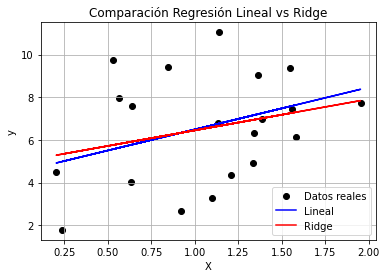

In [16]:

plt.scatter(X_test, y_test, color='black', label='Datos reales')
plt.plot(X_test, y_pred_lr, label='Lineal', color='blue')
plt.plot(X_test, y_pred_ridge, label='Ridge', color='red')
plt.title('Comparación Regresión Lineal vs Ridge')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()